In [1]:
! pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have

In [2]:
pip install pandas_ta 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=c58ecd795e6a6a0a49976e8d77bbded046c813d3b755efa6c4925819f4d414cb
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


Here I Install gensim which is needed to load vectors from the .kv file

In [3]:

from gensim.models import KeyedVectors
import numpy as np
# Setting the script name.
script_name = "Reliance"

# Load the word embeddings
link = "/kaggle/input/trading-dataset/Machine Learning Assignment Dataset/Reliance_embeddings.kv"
word_vectors = KeyedVectors.load(link, mmap='r')

# Getting the vector keys (or filenames in this case)
metadata = word_vectors.index_to_key
W=[]
# Print the first 5 keys and their associated vectors
for key in metadata:  # Adjust the range as needed to print more or fewer keys
    W.append(word_vectors[key])
    


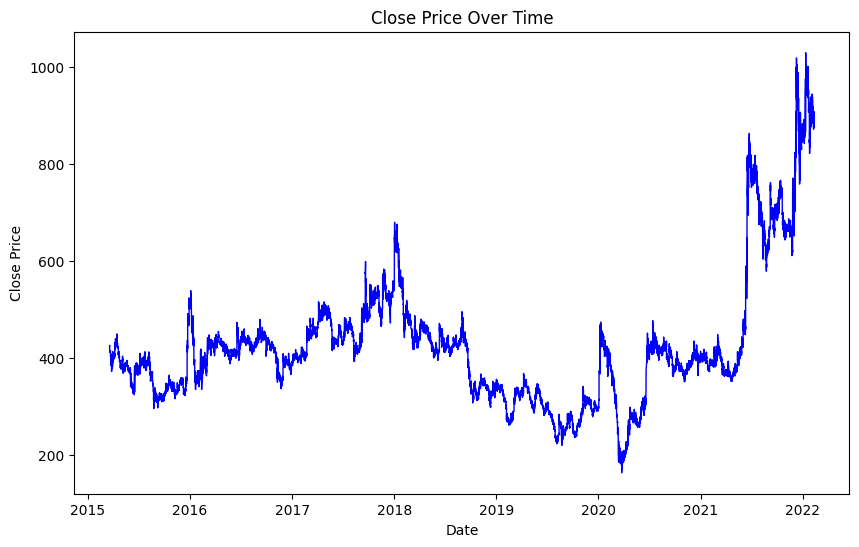

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import
%matplotlib inline

# Load CSV
load_csv = pd.read_csv("/kaggle/input/trading-dataset/Machine Learning Assignment Dataset/Reliance.csv")
df = pd.DataFrame(load_csv)
df['date'] = pd.to_datetime(df['date'])

# Plot the 'close' column over time
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visualization
plt.title("Close Price Over Time")  # Add title to the plot
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Close Price")  # Label for Y-axis
plt.plot(df["date"], df['close'], color='blue', linewidth=1)  # Use the date directly for x-axis

plt.show()  # Display the plot


In [5]:
import pandas_ta as ta
Stock_price=df
Stock_price
Stock_price['rsi'] = ta.rsi(Stock_price.close)
Stock_price['ema'] = ta.ema(Stock_price.close)
Stock_price['Target'] = Stock_price['close']-df.open
Stock_price['Actual Target']= Stock_price['close'].shift(-1)
Stock_price['Target class'] = [1 if Stock_price['Target'][i] > 0 else 0 for i in range(len(Stock_price))]
Stock_price = Stock_price[Stock_price['volume']!=0]
Stock_price =Stock_price.dropna()


In [6]:

cols = ['open','high','low','close','volume','ema','rsi','Target','Actual Target','Target class']
Stock_price= Stock_price[cols]
Stock_price=Stock_price.dropna()
Stock_price

,open,high,low,close,volume,ema,rsi,Target,Actual Target,Target class
14,423.00,423.05,422.50,422.50,163,423.858518,25.155261,-0.50,422.50,0
15,422.60,422.75,422.10,422.50,1578,423.611514,25.155261,-0.10,422.65,0
16,422.75,423.65,422.65,422.65,1188,423.436694,28.165335,-0.10,423.05,0
17,422.65,423.35,422.65,423.05,583,423.366386,35.602974,0.40,423.50,1
18,423.60,423.75,423.10,423.50,775,423.390679,42.780611,-0.10,423.80,0
...,...,...,...,...,...,...,...,...,...,...
636370,894.55,895.45,894.55,895.05,2450,894.692265,52.132730,0.50,896.00,1
636371,895.40,897.05,895.05,896.00,3506,894.930035,55.620044,0.60,895.55,1
636372,895.50,896.50,895.50,895.55,3895,895.042756,53.627033,0.05,896.60,1
636373,895.75,897.00,895.50,896.60,3673,895.325891,57.457590,0.85,894.90,1


Here is the stock prices along the data time

In [7]:

Input_data = np.array(Stock_price.iloc[:29979])
Validation_data = np.array(Stock_price.iloc[29979:])
Cross_validation = np.array(Stock_price.iloc[29979:])
Output_data = W
Input_data

array([[ 4.2300e+02,  4.2305e+02,  4.2250e+02, ..., -5.0000e-01,
         4.2250e+02,  0.0000e+00],
       [ 4.2260e+02,  4.2275e+02,  4.2210e+02, ..., -1.0000e-01,
         4.2265e+02,  0.0000e+00],
       [ 4.2275e+02,  4.2365e+02,  4.2265e+02, ..., -1.0000e-01,
         4.2305e+02,  0.0000e+00],
       ...,
       [ 3.7640e+02,  3.7640e+02,  3.7630e+02, ..., -1.0000e-01,
         3.7625e+02,  0.0000e+00],
       [ 3.7640e+02,  3.7640e+02,  3.7625e+02, ..., -1.5000e-01,
         3.7600e+02,  0.0000e+00],
       [ 3.7640e+02,  3.7640e+02,  3.7570e+02, ..., -4.0000e-01,
         3.7705e+02,  0.0000e+00]])

pp install pan

In [8]:

import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data preparation
# Assuming you have your OHLC data in a NumPy array `ohlc_data` with shape (n_samples, 4)
# And the corresponding 512-dimensional vectors in a NumPy array `vectors` with shape (n_samples, 512)

# Example of random data (replace this with your actual data)
n_samples = 29979
X = Input_data  # OHLC data (replace with actual OHLC data)
y = Output_data  # 512-dimensional vectors (replace with actual vectors)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# Wrap XGBoost with MultiOutputRegressor to handle multi-output regression
multi_output_model = MultiOutputRegressor(xgb_model)

multi_output_model.fit(X,y)

y_pred = multi_output_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict vectors for new OHLC records (replace `new_ohlc_data` with actual data)
new_ohlc_data = Validation_data  # Example data (replace with actual new OHLC data)
predicted_vectors = multi_output_model.predict(new_ohlc_data)

predicted_vectors

Mean Squared Error: 0.00020295225840527564


array([[2.7879036e-05, 2.7677086e-06, 2.0576222e-03, ..., 5.6703295e-05,
        8.9058697e-01, 2.6574789e-08],
       [2.7879036e-05, 2.7677086e-06, 2.1595205e-03, ..., 6.8684101e-05,
        8.8519901e-01, 2.6574789e-08],
       [2.7879036e-05, 2.7677086e-06, 2.7272976e-03, ..., 6.1434890e-05,
        8.8630772e-01, 2.6574789e-08],
       ...,
       [1.8771482e-04, 2.7677086e-06, 3.9542895e-03, ..., 8.6987893e-05,
        8.8412136e-01, 2.6574789e-08],
       [1.8771482e-04, 2.7677086e-06, 2.9689162e-03, ..., 9.5120129e-05,
        8.8436675e-01, 2.6574789e-08],
       [1.8771482e-04, 2.7677086e-06, 5.7271854e-03, ..., 7.6839024e-05,
        8.8428760e-01, 2.6574789e-08]], dtype=float32)

In [9]:
# Concatenate the new vectors with the given vectors 
print(np.array(Output_data).shape)
print(predicted_vectors.shape)
combined_vectors = np.vstack((Output_data,predicted_vectors))
print(combined_vectors.shape)
print(Stock_price.shape)


(29979, 512)
(556883, 512)
(586862, 512)
(586862, 10)


In [10]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.decomposition import PCA

# Assuming input_data is your OHLC and additional data
# Combine input data with vectors


pca = PCA(n_components=4)  # Reduce to 10 components
arr_reduced = pca.fit_transform(combined_vectors)
combined_data = np.hstack((Stock_price,arr_reduced))


# Create sequences for LSTM model
sequence_length = 30  # Example window size for sequence
X = []
y = []

for i in range(sequence_length, len(combined_data)):
    X.append(combined_data[i-sequence_length:i, :])
    y.append(combined_data[i, 3])  # Assuming 'close' is at index 3

X, y = np.array(X), np.array(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Predict Future Closing Prices
predicted_prices = model.predict(X_test)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7336/7336 ━━━━━━━━━━━━━━━━━━━━ 260s 35ms/step - loss: 124654.7500 - val_loss: 21312.6055
Epoch 2/5
7336/7336 ━━━━━━━━━━━━━━━━━━━━ 263s 35ms/step - loss: 20036.4941 - val_loss: 19017.3711
Epoch 3/5
7336/7336 ━━━━━━━━━━━━━━━━━━━━ 260s 35ms/step - loss: 19758.4180 - val_loss: 19023.6055
Epoch 4/5
7336/7336 ━━━━━━━━━━━━━━━━━━━━ 260s 35ms/step - loss: 19557.9980 - val_loss: 19024.5664
Epoch 5/5
7336/7336 ━━━━━━━━━━━━━━━━━━━━ 259s 35ms/step - loss: 19676.8340 - val_loss: 19020.3730
3668/3668 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step


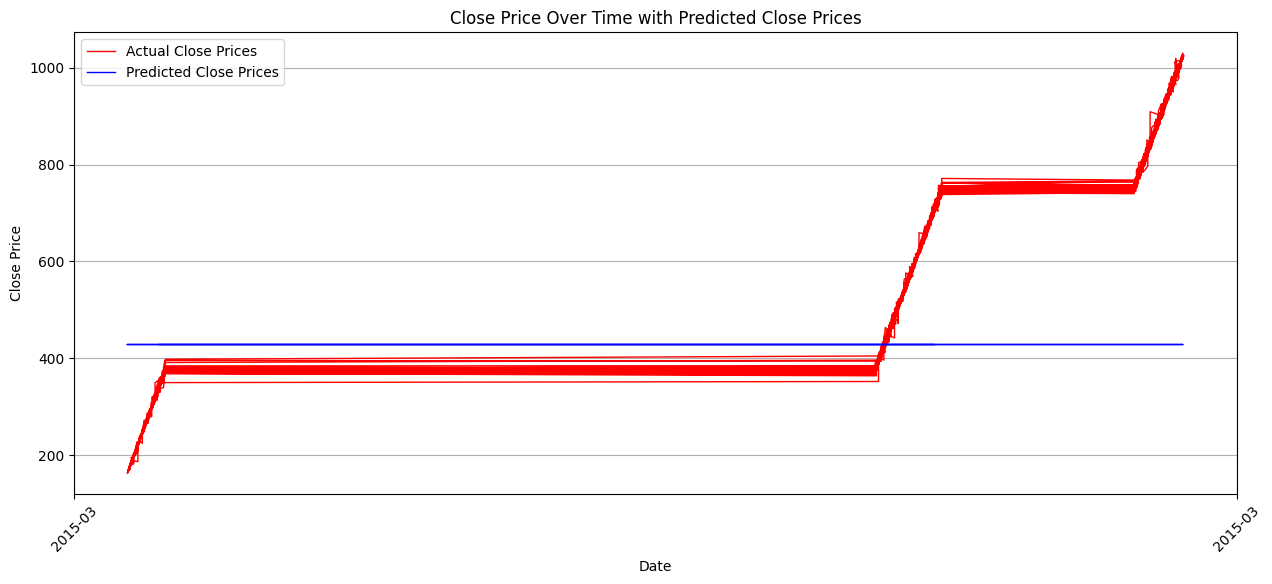

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'date' is a datetime column
df['date'] = pd.to_datetime(df['date'])

# Reshape predicted_prices for correct plotting
predicted_prices = predicted_prices.reshape(predicted_prices.shape[0])

# Extract dates for X (training/overall) and X_test (testing) from DataFrame
overall_dates = df.iloc[X[:, -1, 0]].date  # Adjust indexing as needed to match date column
test_dates = df.iloc[X_test[:, -1, 0]].date  # Extract dates using the last time step in each sequence

# Plot configuration
plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visualization
plt.title("Close Price Over Time with Predicted Close Prices")  # Add title to the plot
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Close Price")  # Label for Y-axis

# Plot actual closing prices (using overall data)
plt.plot(overall_dates, y, color='red', linewidth=1, label='Actual Close Prices')  # Use the date directly for the x-axis

# Plot predicted closing prices (using test data)
plt.plot(test_dates, predicted_prices, color='blue', linewidth=1, label='Predicted Close Prices')

# Set up date formatting for better visualization
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format dates as 'YYYY-MM'

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()
